<a href="https://colab.research.google.com/github/Rullyro/tubesandat/blob/main/tubesanalisisdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Library

In [31]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.svm import SVC

Load Dataset

In [10]:
col_names = ['Sand %', 'Clay %', 'Silt %', 'pH', 'EC mS/cm', 'O.M. %', 'CACO3 %', 'N_NO3 ppm', 'P ppm', 'K ppm', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm', 'Cu ppm', 'B ppm', 'Class']
feature_cols = ['Sand %', 'Clay %', 'Silt %', 'pH', 'EC mS/cm', 'O.M. %', 'CACO3 %', 'N_NO3 ppm', 'P ppm', 'K ppm', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm', 'Cu ppm', 'B ppm']
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/tanahnew.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm,Class
0,1,42,38,20,5.16,0.27,3.78,0.00,14.46,18.61,147,1115,91.32,0.89,27.06,1.77,0.40,Tidak Optimal
1,2,54,26,20,6.07,0.36,1.45,0.00,14.59,32.74,180,1055,60.04,3.66,17.58,1.68,0.41,Optimal
2,3,28,36,36,6.92,0.68,1.77,0.40,14.91,19.02,183,1215,61.24,3.06,18.00,1.84,0.46,Optimal
3,4,58,20,22,7.70,0.36,0.72,6.80,4.21,6.28,116,327,19.54,1.64,5.04,0.84,0.50,tidak optimal
4,5,33,41,26,7.61,0.39,1.00,4.39,6.11,6.55,228,939,25.84,0.18,7.16,1.22,0.40,tidak optimal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,777,26,46,28,6.72,0.45,2.08,0.00,7.66,20.67,395,500,38.07,0.39,26.48,1.47,0.33,Optimal
777,778,40,28,32,7.79,0.34,1.38,30.00,5.20,4.14,286,154,12.79,0.24,6.33,0.60,0.12,tidak optimal
778,779,34,28,38,7.63,1.14,1.87,24.30,17.13,6.90,582,164,10.73,0.44,5.39,1.14,0.26,tidak optimal
779,780,16,38,46,7.73,0.39,1.72,46.30,3.92,7.93,335,572,11.61,0.26,3.77,2.20,0.27,tidak optimal


### **Data Preparataion**


# Columns Name

In [11]:
# Konversi EC
df['EC mS/cm']=df['EC mS/cm']*10
df['EC mS/cm'].describe()

count    781.000000
mean       4.532522
std        3.048878
min        1.300000
25%        3.400000
50%        4.000000
75%        5.000000
max       56.200000
Name: EC mS/cm, dtype: float64

In [12]:
df = df.drop(['ID'], axis=1)

In [13]:
df

,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm,Class
0,42,38,20,5.16,2.7,3.78,0.00,14.46,18.61,147,1115,91.32,0.89,27.06,1.77,0.40,Tidak Optimal
1,54,26,20,6.07,3.6,1.45,0.00,14.59,32.74,180,1055,60.04,3.66,17.58,1.68,0.41,Optimal
2,28,36,36,6.92,6.8,1.77,0.40,14.91,19.02,183,1215,61.24,3.06,18.00,1.84,0.46,Optimal
3,58,20,22,7.70,3.6,0.72,6.80,4.21,6.28,116,327,19.54,1.64,5.04,0.84,0.50,tidak optimal
4,33,41,26,7.61,3.9,1.00,4.39,6.11,6.55,228,939,25.84,0.18,7.16,1.22,0.40,tidak optimal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,26,46,28,6.72,4.5,2.08,0.00,7.66,20.67,395,500,38.07,0.39,26.48,1.47,0.33,Optimal
777,40,28,32,7.79,3.4,1.38,30.00,5.20,4.14,286,154,12.79,0.24,6.33,0.60,0.12,tidak optimal
778,34,28,38,7.63,11.4,1.87,24.30,17.13,6.90,582,164,10.73,0.44,5.39,1.14,0.26,tidak optimal
779,16,38,46,7.73,3.9,1.72,46.30,3.92,7.93,335,572,11.61,0.26,3.77,2.20,0.27,tidak optimal


# Splitting Feature & Class

In [14]:
X = df.iloc[:,1:17] # Features
Y = pd.DataFrame(df['Class']) # Target variable

In [15]:
X

,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm,Class
0,38,20,5.16,2.7,3.78,0.00,14.46,18.61,147,1115,91.32,0.89,27.06,1.77,0.40,Tidak Optimal
1,26,20,6.07,3.6,1.45,0.00,14.59,32.74,180,1055,60.04,3.66,17.58,1.68,0.41,Optimal
2,36,36,6.92,6.8,1.77,0.40,14.91,19.02,183,1215,61.24,3.06,18.00,1.84,0.46,Optimal
3,20,22,7.70,3.6,0.72,6.80,4.21,6.28,116,327,19.54,1.64,5.04,0.84,0.50,tidak optimal
4,41,26,7.61,3.9,1.00,4.39,6.11,6.55,228,939,25.84,0.18,7.16,1.22,0.40,tidak optimal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,46,28,6.72,4.5,2.08,0.00,7.66,20.67,395,500,38.07,0.39,26.48,1.47,0.33,Optimal
777,28,32,7.79,3.4,1.38,30.00,5.20,4.14,286,154,12.79,0.24,6.33,0.60,0.12,tidak optimal
778,28,38,7.63,11.4,1.87,24.30,17.13,6.90,582,164,10.73,0.44,5.39,1.14,0.26,tidak optimal
779,38,46,7.73,3.9,1.72,46.30,3.92,7.93,335,572,11.61,0.26,3.77,2.20,0.27,tidak optimal


# Normalisasi

In [24]:
# # Normalisasi
# sc = MinMaxScaler(feature_range=(0, 1))
# X_Normalize = pd.DataFrame(data=sc.fit_transform(X),columns=feature_cols)
df['Clay %_Nor'] = (df["Clay %"] - df["Clay %"].min()) / (df["Clay %"].max() - df["Clay %"].min())

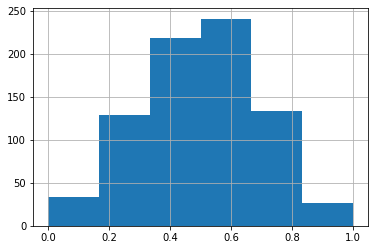

In [25]:
# Memvisualisasikan variabel Clay % setelah normalisasi
df["Clay %_Nor"].hist(bins=6)

###  **Modelling**

Membangun Train Test Data

In [36]:
X = df.drop(['Clay %'], axis = 1)
y = df['Clay %']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  546
y Train :  546
X Test :  235
t Test :  235


Membangun Model Classifier

In [37]:
classifier = SVC(kernel = 'linear', C= 0.1)
classifier.fit(X_train, y_train)

ValueError: ignored